In [16]:
import ollama
import numpy as np


from src.database.db import Database
import umap

db = Database()

c:\Users\giuse\Documenti\DataScience\book_library\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2026-01-24 22:16:07,485 | INFO     | book_library | db:43 | Connecting to database at c:\Users\giuse\Documenti\DataScience\book_library\data\books.db


In [19]:
with db:
    books_descriptions = db.run_query("SELECT id, description, title FROM books where description is not NULL", as_dataframe=True).set_index('id')

books_descriptions

2026-01-24 22:16:34,576 | INFO     | book_library | db:43 | Connecting to database at c:\Users\giuse\Documenti\DataScience\book_library\data\books.db
2026-01-24 22:16:34,578 | INFO     | book_library | db:53 | Database connection closed.


,description,title
id,,
e8b9e46f-6c64-423d-934a-4cb04c049581,An illustrated photography guide by renowned n...,L'arte della fotografia. Ediz. illustrata
9d952f0d-e2a0-40c7-8e2a-616373fc2471,A comprehensive photography manual by professi...,Composizione. Corso completo di tecnica fotogr...
a98a6af3-e27f-471e-8ebb-a3754bafaef0,From an elephant resting with his master to a ...,Steve McCurry. Animals
dad34de9-921b-42d8-adf0-908be15c4aa9,Per te che hai scelto di aiutarti in cucina co...,Ricette per la Tua Slow Cooker
7f1d7cde-eeb9-4613-8397-e78b80f039bb,A comprehensive guide by food scientist Dr. St...,La scienza delle spezie. Scopri nuovi modi di ...
8d7b9f3a-9e90-43a8-8e0d-e6a78a6d3660,Feast on all of the delicious offerings found ...,The Elder Scrolls Cookbook
677aff79-0cbe-4e91-84ab-3c4e27cc815b,"A culinary guide by Daniele Reponi, Italian sa...",La grammatica del panino
bdc7398f-8a67-40f3-9f8b-9768b39df866,A science-based guide to household cleaning by...,La scienza delle pulizie. La chimica del deter...
e6e2b204-d93a-4783-8d30-ce08fd19946c,A popular science book by Italian chemist Dari...,La scienza delle verdure. La chimica del pomod...


In [20]:
response = ollama.embed(
    model='qwen3-embedding:0.6b',
    input=books_descriptions['description'].tolist(),
)
print(response.embeddings)

[[0.043955993, -0.078488536, -0.0043099932, 0.052234154, -0.007832017, 0.042691104, 0.11358452, 0.02917323, 0.0015216046, -0.0142316315, 0.026949422, -0.0665169, -0.055411447, -0.003771411, -0.022073496, 0.003883271, -0.07972195, 0.06536967, 0.038654473, -0.013320566, -0.04411432, -0.010687861, 0.0291879, 0.1063589, -0.09577446, -0.017094351, -0.0067432653, 0.01421286, -0.023931557, -0.049928695, 0.02206643, -0.007462828, 0.03405833, -0.015179325, -0.04551734, -0.0039020781, -0.023090353, 0.022219144, 0.0092653325, -0.0044793063, 0.027899532, 0.0029421856, -0.03378514, 0.00044246452, -0.058054432, -0.035058558, -0.010461347, -0.016535884, -0.0013858132, -0.013967287, -0.010589532, -0.05906782, 0.011648104, -0.030536015, -0.021507418, 0.0035183649, 0.010562802, -0.05562844, -0.0120111555, 0.021343997, 0.030020608, 0.009288656, -0.09621185, 0.08888146, 0.005318972, -0.023571076, 0.027510235, -0.012763788, -0.05012618, -0.038843784, 0.011006139, 0.0698847, -0.04727029, -0.012485077, 0.002

In [21]:
reducer = umap.UMAP()

embeddings_2d = reducer.fit_transform(np.array(response.embeddings))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers+text',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'text': array(["L'arte della fotografia. Ediz. illustrata",
                             'Composizione. Corso completo di tecnica fotografica',
                             'Steve McCurry. Animals', 'Ricette per la Tua Slow Cooker',
                             'La scienza delle spezie. Scopri nuovi modi di utilizzarle e rivoluziona la tua cucina',
                             'The Elder Scrolls Cookbook', 'La grammatica del panino',
                             'La scienza delle pulizie. La chimica del detersivo e della candeggina, e le bufale sul bicarbonato',
                             'La scienza delle verdure. La chimica del pomodoro e della cipolla',
                             "Due passi tra le stelle. Come riconoscere costellazioni, stelle e pianeti in ogni stagione dell'anno",
                             'Probably Overthinking It', 'Working Backwards', 'Relativity',
                             'Ready to Wear', 'How to Have Impossible Conversations',
                             'Le 48 leggi del potere', 'A Concise History of Italy',
                             'Antifragile. Prosperare nel disordine',
                             "Perché alle zebre non viene l'ulcera? La più istruttiva e divertente guida allo stress e alle malattie che produce. Con tutte le soluzioni per vincerlo",
                             "L'odore dei soldi", 'Dataclysm', 'The Righteous Mind',
                             'Soldi. Conoscere le logiche del denaro per capire le grandi crisi',
                             'Algorithms to Live By',
                             "I sette peccati capitali dell'economia italiana", 'Sapiens',
                             "L'uomo del labirinto", 'Fu sera e fu mattina',
                             'Thinking, Fast and Slow', 'La vita immortale di Henrietta Lacks',
                             'Musicofilia', 'Awakenings', 'Allucinazioni',
                             "Il cigno nero. Come l'improbabile governa la nostra vita",
                             'How to Lie with Statistics',
                             'Bestiario matematico. Mostri e strane creature nel regno dei numeri',
                             'The Mathematics of Love', 'Il più grande venditore del mondo', 'Noise',
                             'Factfulness', "Lo zen e il tiro con l'arco",
                             "«L'amore vince sempre sull'invidia e sull'odio»",
                             "Breve storia dell'intelligenza. Dai primi organismi all'AI: le cinque svolte evolutive del cervello",
                             'Il guardiano degli innocenti. The Witcher', "L'avversario",
                             'Il Maestro e Margherita', 'Il buio oltre la siepe',
                             'Magic of the Angels', 'Fire and Blood',
                             'Unfinished Tales of Númenor and Middle-earth', 'Il Silmarillion',
                             'Memorie dal sottosuolo', 'La fattoria degli animali',
                             'Il processo. Ediz. integrale', 'Delitto e castigo. Ediz. integrale',
                             'Orgoglio e pregiudizio. Ediz. integrale',
                             'Enigmi. I migliori rompicapi logici e matematici di tutti i tempi',
                             'Dracula'], dtype=object),
              'textposition': 'top center',
              'type': 'scatter',
              'x': {'bdata': ('QlIFQRw/A0HpHgZB9+PpQNjl9kAAg9' ... 'D7Ya9AaB6uQJZUv0C2EuNA7eivQA=='),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('s5WjQKQroEDHM5VAjp3IQMnUtECTGd' ... 'C3b4RANFeOQO1rpECDKK9AT+OeQA=='),
                    'dtype': 'f4'},
     

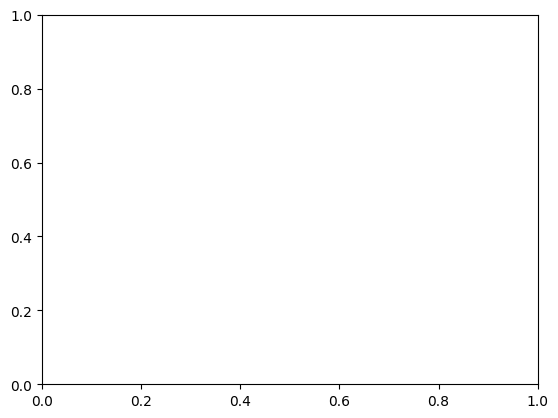

In [ ]:
# plotly scatterplot of the books umap with title overlay
import plotly.express as px

fig = px.scatter(x=embeddings_2d[:,0], y=embeddings_2d[:,1], hover_name=books_descriptions['title'])
fig.update_traces(textposition='top center')